In [1]:
import os 
import face_recognition
import matplotlib.pyplot as plt
import cv2
import pickle

# Validating Images

**It is better to validate the images to see if face is detected or not (only one face should be detected) in every face angle before generating encodings. Afer validations, we can generate encoding.**

**Note: There should be 'photos' folder where this notebook (validateData_generateEncodings.ipynb) is located. All the images should be inside 'photos' folder in following format:**

```
photos/
├── person_1_id/
│   ├── person_1_front.jpg
│   ├── person_1_down.jpg
│   ├── person_1_up.jpg
│   ├── person_1_left.jpg
│   └── person_1_right.jpg
├── person_2_id/
│   ├── person_2_front.jpg
│   ├── person_2_down.jpg
│   ├── person_2_up.jpg
│   ├── person_2_left.jpg
│   └── person_2_right.jpg
├── person_3_id/
│   ├── person_3_front.jpg
│   ├── person_3_down.jpg
│   ├── person_3_up.jpg
│   ├── person_3_left.jpg
│   └── person_3_right.jpg
└── ...

```

./photos/23140736-BCU-ABHASH-RAI/down.jpg


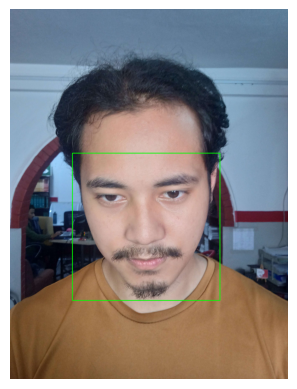

./photos/23140736-BCU-ABHASH-RAI/front.jpg


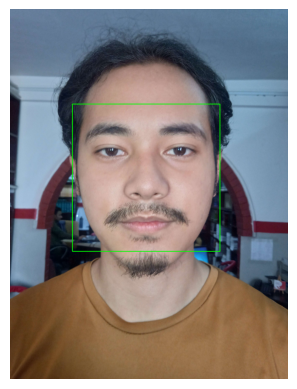

./photos/23140736-BCU-ABHASH-RAI/left.jpg


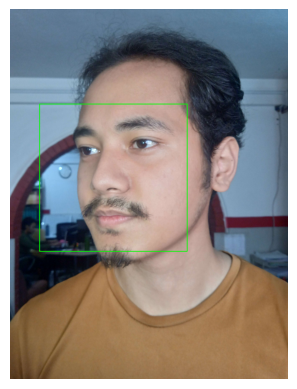

./photos/23140736-BCU-ABHASH-RAI/right.jpg


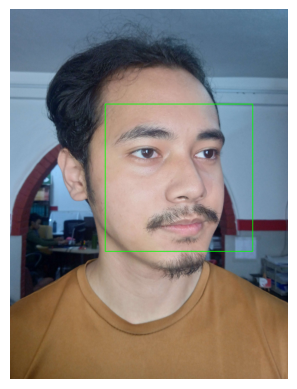

./photos/23140736-BCU-ABHASH-RAI/up.jpg


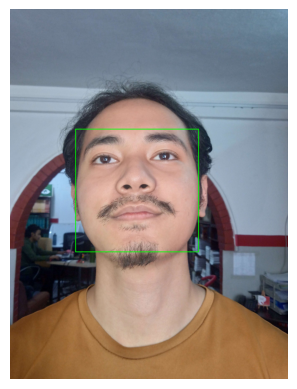

./photos/23140741-BCU-NANAK-SHRESTHA/down.jpg


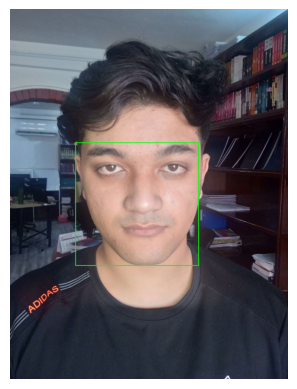

./photos/23140741-BCU-NANAK-SHRESTHA/front.jpg


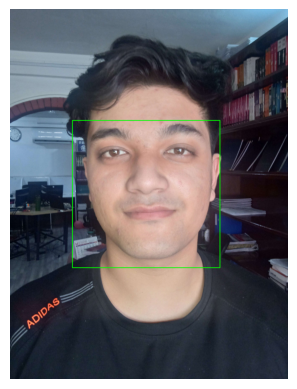

./photos/23140741-BCU-NANAK-SHRESTHA/left.jpg


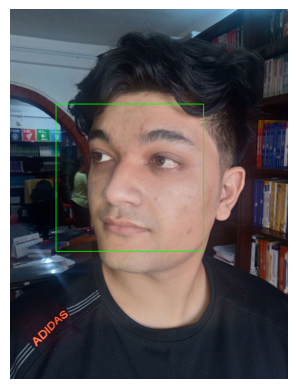

./photos/23140741-BCU-NANAK-SHRESTHA/right.jpg


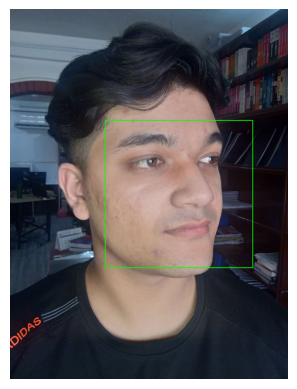

./photos/23140741-BCU-NANAK-SHRESTHA/up.jpg


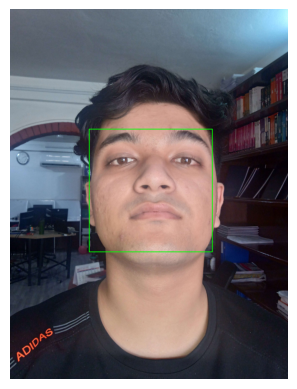

./photos/23140745-BCU-SADIKSHYA-GHIMIRE/down.jpg


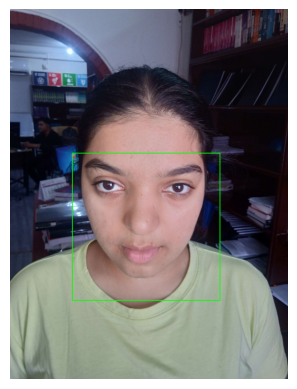

./photos/23140745-BCU-SADIKSHYA-GHIMIRE/front.jpg


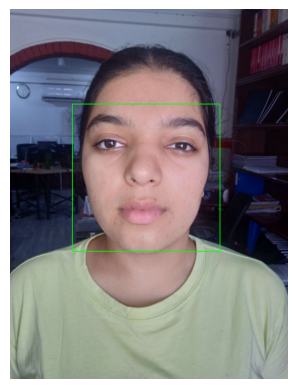

./photos/23140745-BCU-SADIKSHYA-GHIMIRE/left.jpg


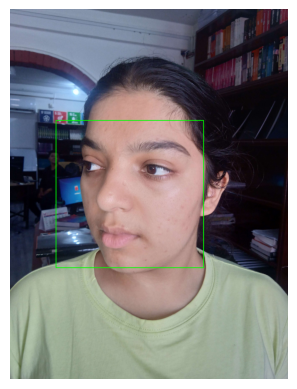

./photos/23140745-BCU-SADIKSHYA-GHIMIRE/right.jpg


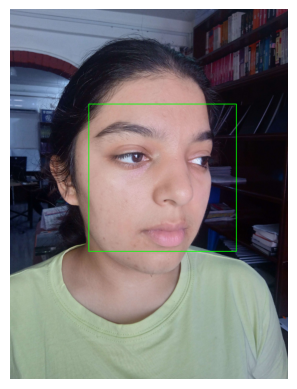

./photos/23140745-BCU-SADIKSHYA-GHIMIRE/up.jpg


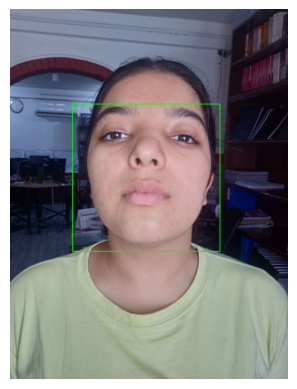

./photos/23140750-BCU-SUDEEP-FULLEL/down.jpg


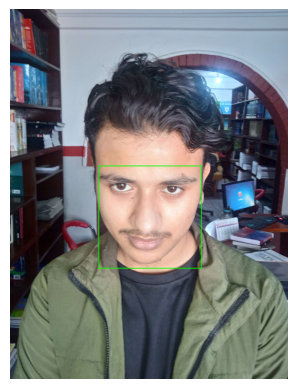

./photos/23140750-BCU-SUDEEP-FULLEL/front.jpg


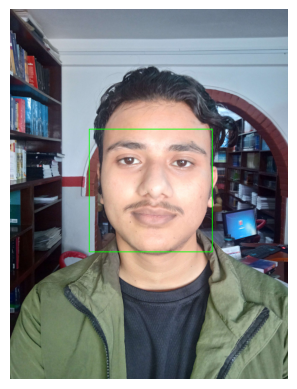

./photos/23140750-BCU-SUDEEP-FULLEL/left.jpg


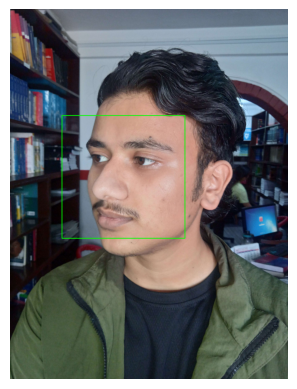

./photos/23140750-BCU-SUDEEP-FULLEL/right.jpg


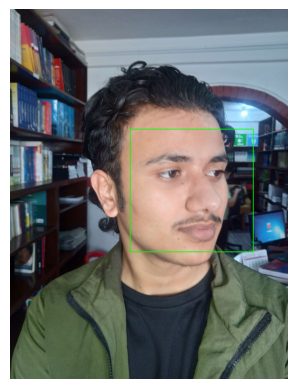

./photos/23140750-BCU-SUDEEP-FULLEL/up.jpg


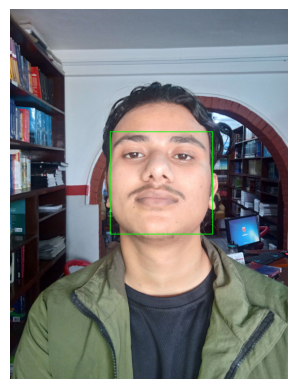

In [2]:
def validate_images(images_folder_path='./photos'):

    all_directories = os.listdir(images_folder_path)

    for folder in all_directories:

        all_files = os.listdir(f'{images_folder_path}/{folder}')
        img_path = [filename for filename in all_files if filename.lower().endswith(('.jpg', '.png', '.jpeg', '.gif', '.bmp'))] # Filter for image files (e.g., .jpg, .png, .jpeg)
        
        for img in img_path:
            print(f'{images_folder_path}/{folder}/{img}')
            image = cv2.imread(f'{images_folder_path}/{folder}/{img}')
            
            # Detect faces in the image
            face_locations = face_recognition.face_locations(image)
            
            for (top, right, bottom, left) in face_locations:
                # Draw a green rectangle around the detected face
                cv2.rectangle(image, (left, top), (right, bottom), (0, 255, 0), 8)
            
            # Convert BGR image to RGB for displaying with matplotlib
            image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
            
            # Display the image
            plt.imshow(image_rgb)
            plt.axis('off')  # Turn off axis labels
            plt.show()

validate_images("./photos")

# Generate Face Encodings

In [4]:

def generate_encodings(images_folder_path='./photos'):

    all_face_encodings = {}

    all_directories = os.listdir(images_folder_path)

    for folder in all_directories:
        
        face_encodings = []

        all_files = os.listdir(f'{images_folder_path}/{folder}')
        img_path = [filename for filename in all_files if filename.lower().endswith(('.jpg', '.png', '.jpeg', '.gif', '.bmp'))] # Filter for image files (e.g., .jpg, .png, .jpeg)
        
        for img in img_path:
            image = face_recognition.api.load_image_file(f'{images_folder_path}/{folder}/{img}')
            encoding = face_recognition.api.face_encodings(image, model='large')
            if len(encoding) > 0:
                face_encodings.append(encoding[0])
                print(f'Successfully generated face encodings of "{images_folder_path}/{folder}/{img}"')
            else:
                print(f'No face detected in {images_folder_path}/{folder}/{img}')
                return
            
        all_face_encodings[folder] = face_encodings
        
    with open('./database/known_face_encodings', 'wb') as file:
        pickle.dump(all_face_encodings, file)

generate_encodings("./photos")

Successfully generated face encodings of "./photos/23140736-BCU-ABHASH-RAI/down.jpg"
Successfully generated face encodings of "./photos/23140736-BCU-ABHASH-RAI/front.jpg"
Successfully generated face encodings of "./photos/23140736-BCU-ABHASH-RAI/left.jpg"
Successfully generated face encodings of "./photos/23140736-BCU-ABHASH-RAI/right.jpg"
Successfully generated face encodings of "./photos/23140736-BCU-ABHASH-RAI/up.jpg"
Successfully generated face encodings of "./photos/23140741-BCU-NANAK-SHRESTHA/down.jpg"
Successfully generated face encodings of "./photos/23140741-BCU-NANAK-SHRESTHA/front.jpg"
Successfully generated face encodings of "./photos/23140741-BCU-NANAK-SHRESTHA/left.jpg"
Successfully generated face encodings of "./photos/23140741-BCU-NANAK-SHRESTHA/right.jpg"
Successfully generated face encodings of "./photos/23140741-BCU-NANAK-SHRESTHA/up.jpg"
Successfully generated face encodings of "./photos/23140745-BCU-SADIKSHYA-GHIMIRE/down.jpg"
Successfully generated face encodings 